# <font color='red'>TME ROBOTIQUE ET APPRENTISSAGE</font>
# <font color='red'>Stratégies d'Evolution et Robotique Autonome</font>

<font color="red">Version étudiant 2023</font>

<b><font color='green'>GROUPES 1 et 2</font></b>

*mise à jour: 9/3/2023*

Ce notebook doit être exécuté dans [Google Colab](colab.research.google.com/) (mais vous pouvez aussi l'utiliser avec Jupyter Lab)

Vous devez déposer votre travail sur Moodle:
* déposer votre notebook, avec le nom de fichier *obligatoirement* au format suivant: **RA_NOM1_NOM2.ipynb**. 
* toutes les cellules exécutées
* des graphes et un commentaire *court* lorsque cela est demandé
* la partie B est à faire en autonomie
* la partie C ne sera pas évaluée

*Le sujet est à faire en binome.*

# COMPLETEZ LES CHAMPS CI-DESSOUS AVEC NOM/PRENOM/CARTE_ETU:

* Étudiant 1: **Buisson Marc 28614429**
* Étudiant 2: **Slimani Nour Ismahane _noCarteEtudiant_**



# <font color='orange'>PARTIE A: optimisation dans un espace de recherche continu</font>

# Importation des librairies et définition des fonctions utiles pour la partie A

Remarque: *Il est nécessaire d'exécuter ces cellules une seule fois. En cas de redémarrage du noyau, il faut relancer ces cellules. Il n'est pas nécessaire de regarder le code de ces cellules, elles servent seulement de soutien à la partie A.*

In [ ]:
from datetime import datetime
from datetime import date
#import importlib # une seule fois
import sys
import random
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.optimize import minimize

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-17 15:32:35 GMT
OK.


In [ ]:
#!pip install numpy scipy matplotlib pandas sympy nose
!pip install deap
!pip install cma
#!pip install --user pygame

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

 2023-03-17 15:32:48 GMT
OK.


In [ ]:
# plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random
from scipy.optimize import minimize


def plot_results(my_func, my_points, min_x=-30, max_x=30, min_y=-30, max_y=30, nbx=100, nby=100, title="Title"):
    """Plots a 2D function with a heatmap and the points given as argument are plotted on top of it

    Plots a 2D function with a heatmap and the points given as argument are plotted on top of it:
    :param my_func: the function to plot on the background
    :param my_points: the points to plot
    :param min_x: min value of x
    :param max_x: max value of x
    :param min_y: min value of y
    :param max_y: max value of y
    :param nbx: number of my_func samples on the X-axis
    :param nby: number of my_func samples on the Y-axis
    :param title: title of the figure
    """
    X = np.linspace(min_x, max_x, num=nbx)
    Y = np.linspace(min_y, max_y, num=nby)
    Z=np.zeros((nbx,nby),dtype=np.double)
    for i in range(nbx):
        for j in range(nby):
            Z[i][j]=my_func([X[i],Y[j]])
    fig,ax=plt.subplots(figsize=(5,5))
    ax.set_xlim(min_x,max_x)
    ax.set_ylim(min_y,max_y)
    ax.imshow(Z, cmap='hot', interpolation='nearest',extent=(min_x,max_x,min_y,max_y))
    
    #print("Points: "+str(my_points))
    x=[]
    y=[]
    for p in my_points:
        x.append(p[0])
        y.append(p[1])

    ax.plot(x,y,".")
    ax.set_title(title)
    plt.show()

def plot_violin(res):
    """ Makes a violin plot of the results provided in the argument

    Makes a violin plot of the results provided in the argument.
    :param res: dictionary of the results to plot. The key is the name and the data is a vector of performance values.
    """
    fig,ax=plt.subplots(figsize=(5,5))
    data=[]
    labels=[]
    for k in res.keys():
        data.append(res[k])
        labels.append(k)
    ax.violinplot(data,
                   showmeans=False,
                   showmedians=True)
    ax.set_title('Violin plot')
    # adding horizontal grid lines
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(data))])
    ax.set_xlabel('Optimization methods')
    ax.set_ylabel('Best value found')

    # add x-tick labels
    plt.setp(ax, xticks=[y + 1 for y in range(len(data))],
        xticklabels=labels)
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()
  
print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-17 15:32:49 GMT
OK.


In [ ]:
# myEvalFn
# requires: CMA

import sys
import cma
import cma.purecma as purecma
from deap import benchmarks

def ackley(x):
    return benchmarks.ackley(x)[0]

def sphere(x):
    return benchmarks.sphere(x)[0]

def rastrigin(x):
    return benchmarks.rastrigin(x)[0]


#### #### ####

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-17 15:32:50 GMT
OK.


In [ ]:
# myEvalFn

def ackley(x):
    return benchmarks.ackley(x)[0]

def sphere(x):
    return benchmarks.sphere(x)[0]

def rastrigin(x):
    return benchmarks.rastrigin(x)[0]

init_pSG = False # WARNING: pSG.initAll() should NEVER be called BEFORE calling explore(.)
def explore(x):  # NOTE: display should be false whenever an optimiser is called
    global init_pSG
    if init_pSG == False:
        pSG.initAll()
        init_pSG = True
    return -pSG.evaluate(x)   # remember: we minimise!

#### #### ####

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-17 15:32:50 GMT
OK.


---

# Exercice A-0: recherche au hasard

Etudiez le code ci-dessous. Il s'agit d'un algorithme de recherche aléatoire, qui explore l'environnement naïvement et stocke le meilleur score obtenu jusqu'ici. Vous testerez cette bibliothèque sur la fonction de Sphere, Ackley, puis Rastrigin, en dimension 2 pour l'instant. Observez l'évolution de la population. 

Dans les exercices suivants, vous pouvez utiliser ce code comme point de départ en le modifiant librement.

Remarque: la variable *dimensions* définit le nombre de dimensions du problème. Dans l'exemple ci-dessous, le nombre de dimensions est fixé arbitrairement à 16. Notez que la fonction *plot_results* n'affiche que les deux premières dimensions, d'ou le fait que le meilleur individu peut s'approcher ou s'éloigner du centre (ou se trouve la meilleure solution). Vous pouvez aussi tester ce code (ainsi que ceux que vous écrirez) avec 2 dimensions seulement. La convergence sera plus rapide (voire très rapide), mais le rendu sera plus fidèle à l'exploration de l'espace de recherche, puisqu'entièrement représenté.

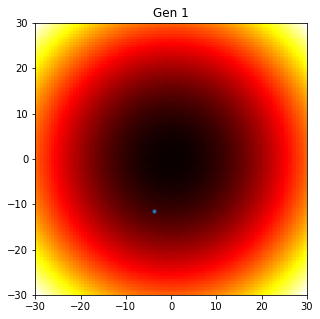

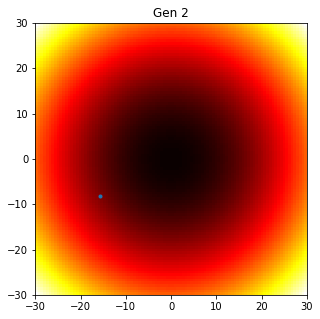

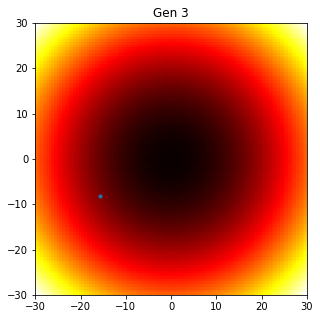

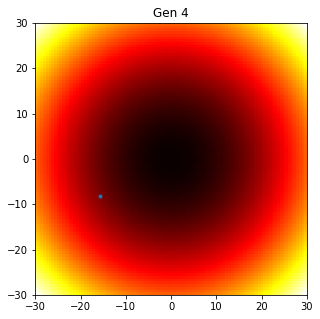

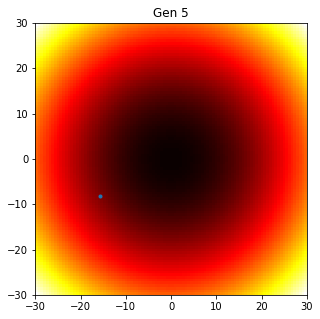

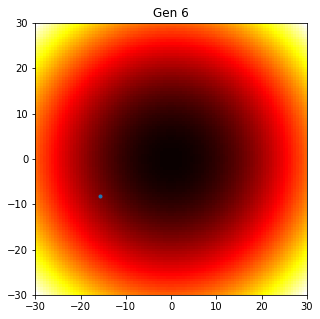

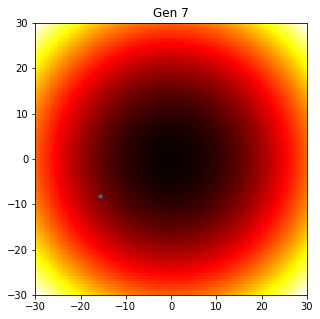

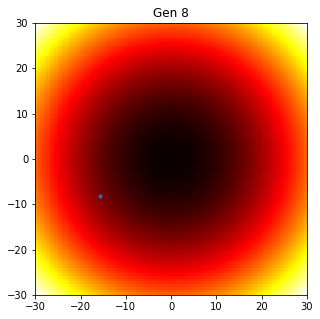

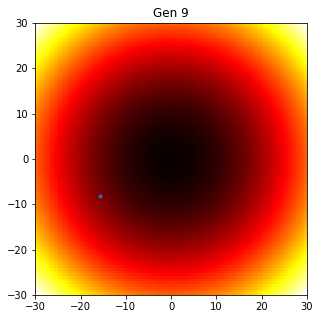

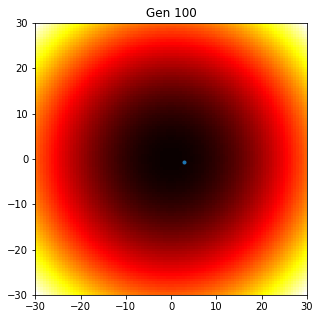

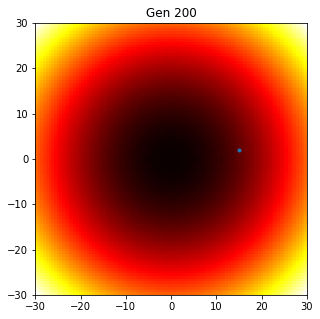

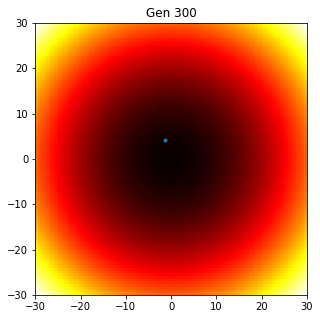

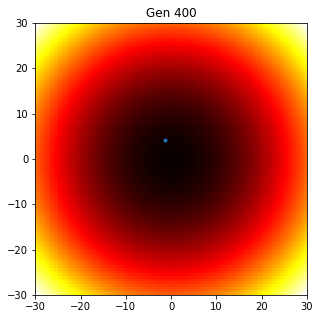

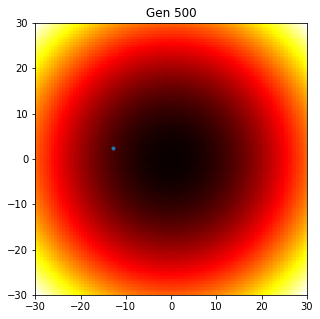

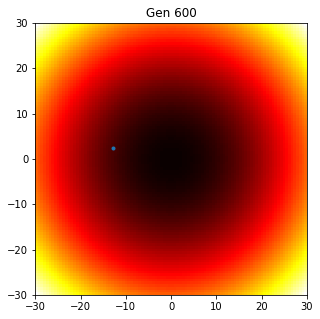

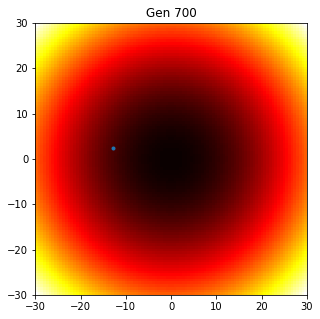

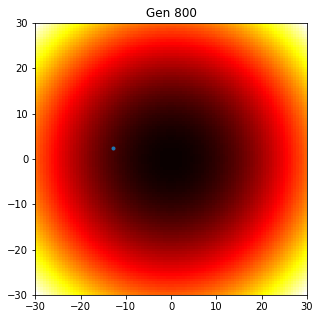

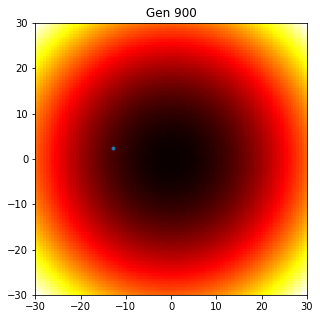

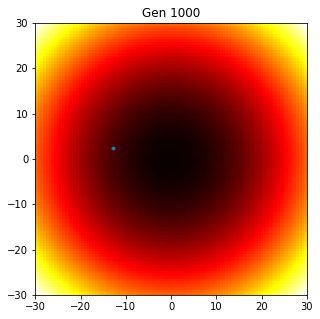

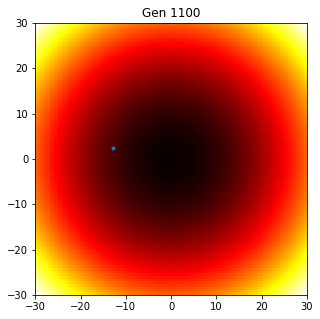

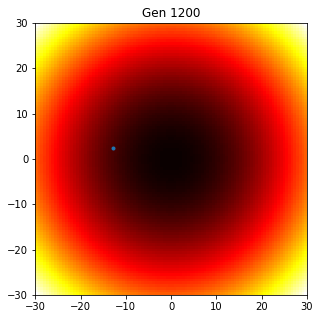

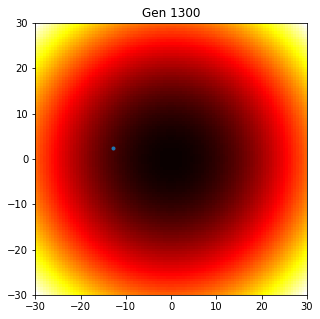

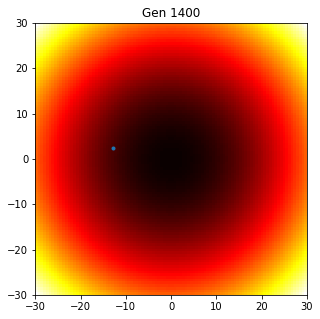

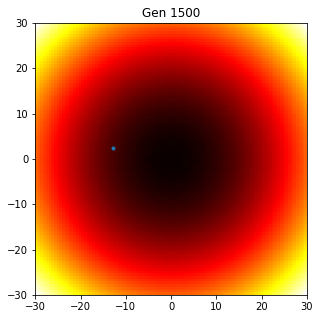

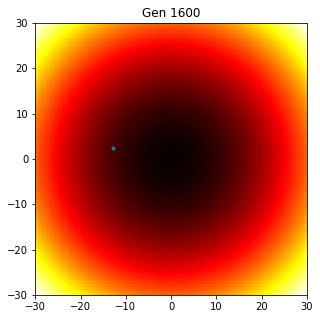

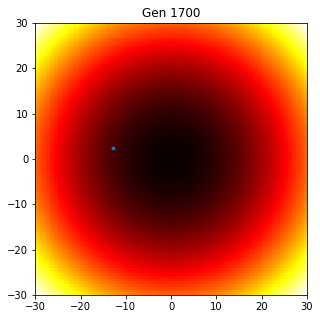

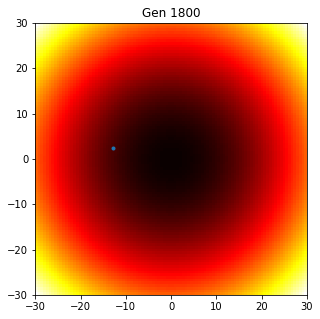

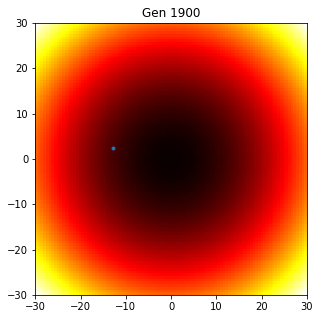

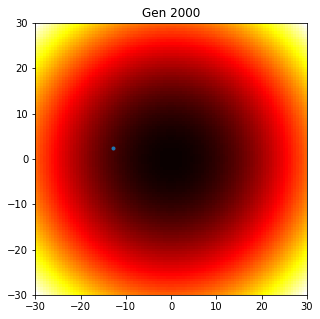

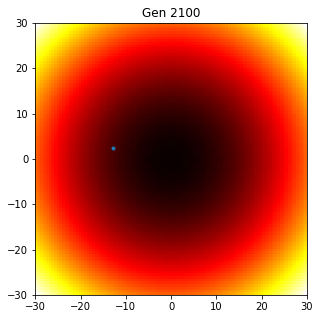

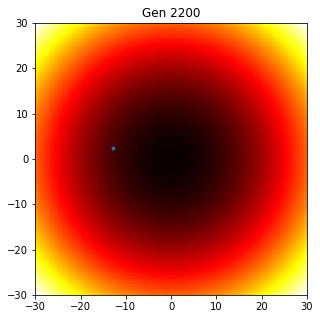

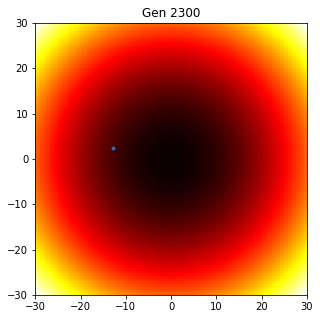

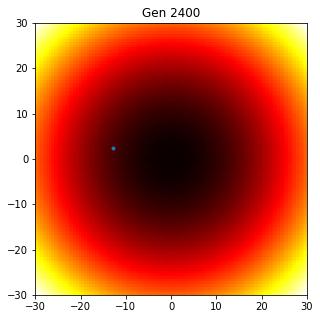

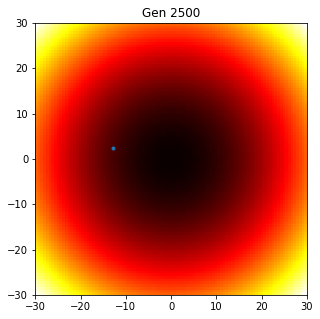

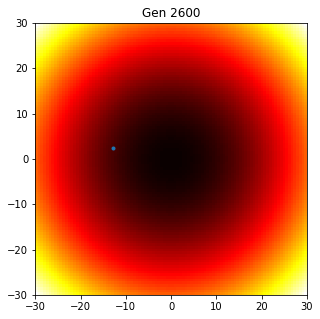

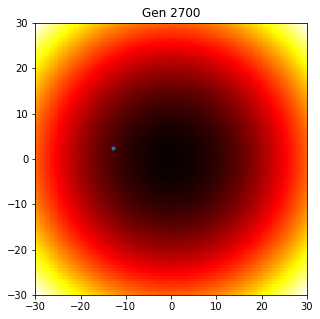

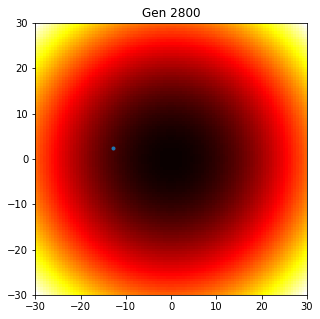

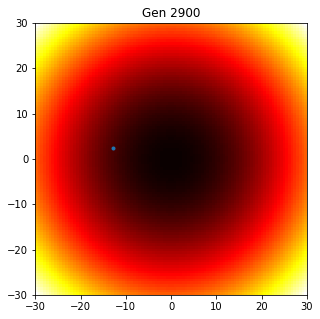

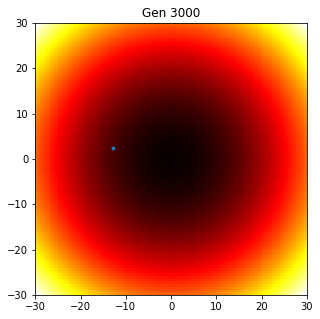

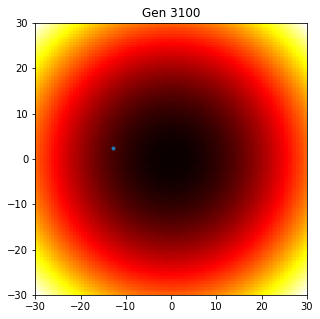

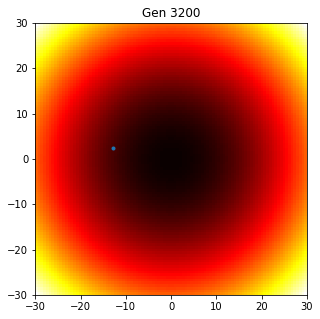

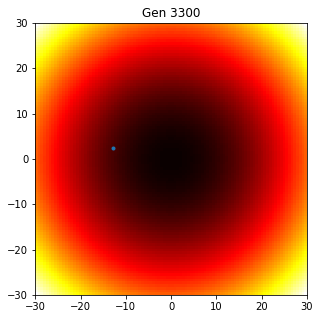

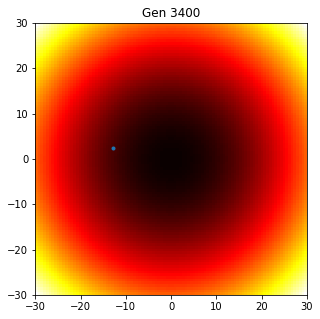

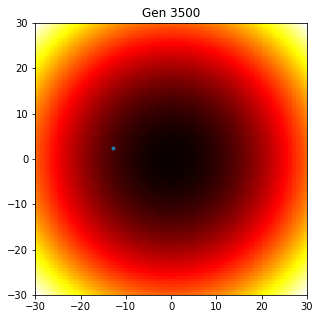

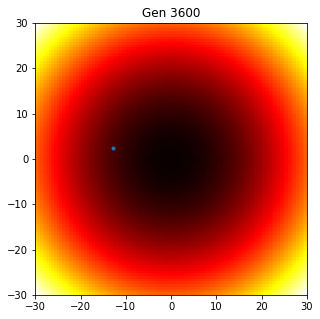

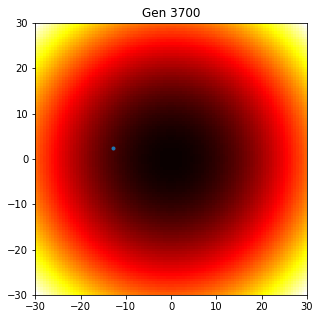

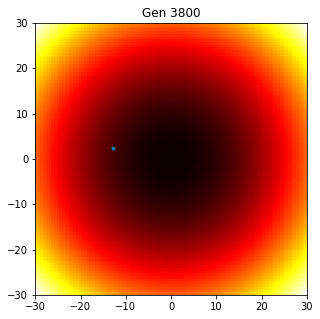

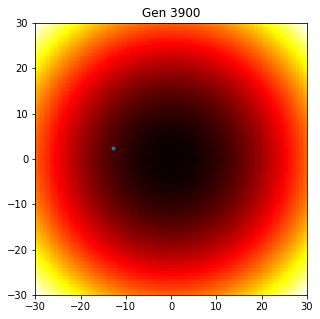

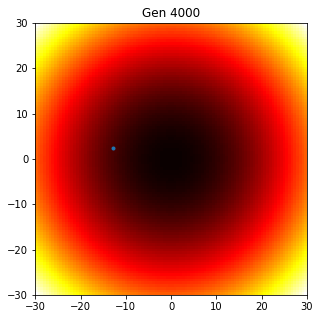

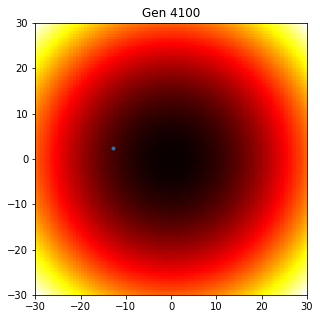

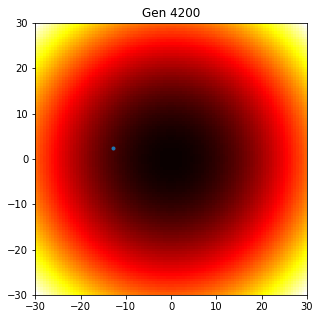

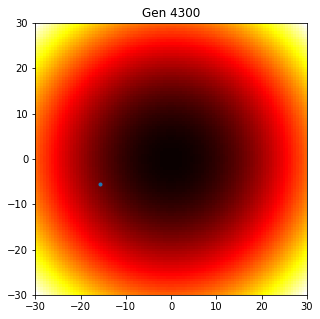

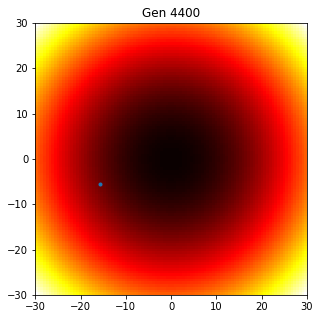

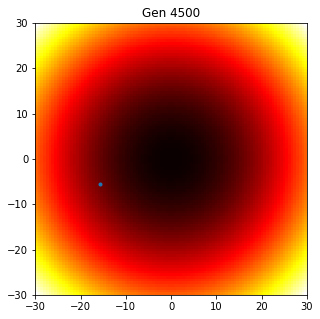

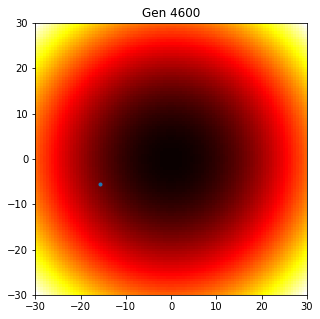

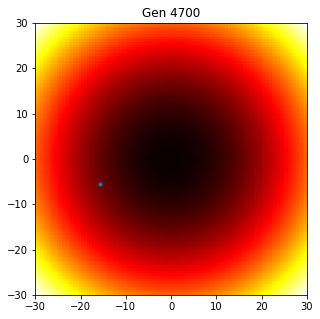

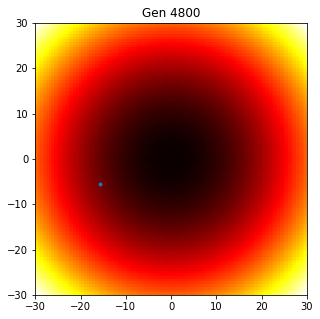

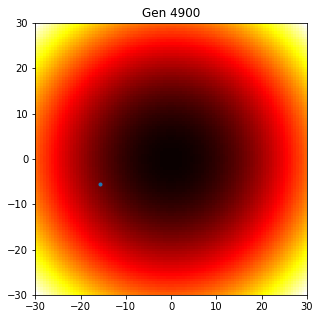

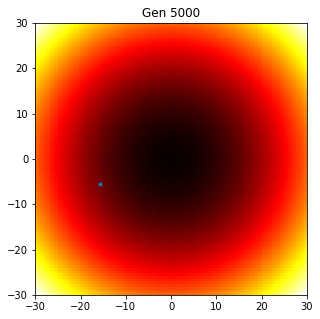

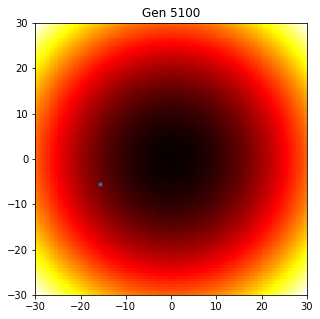

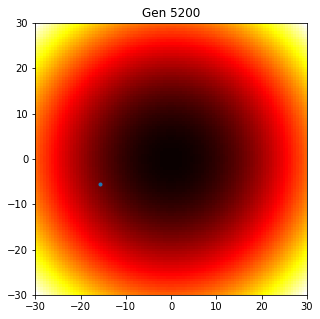

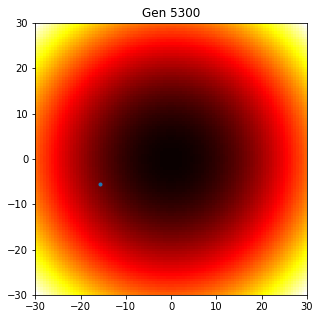

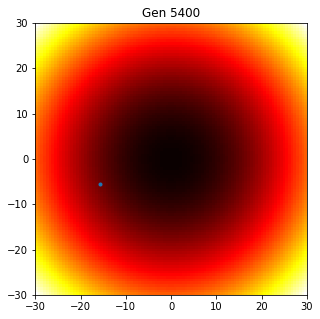

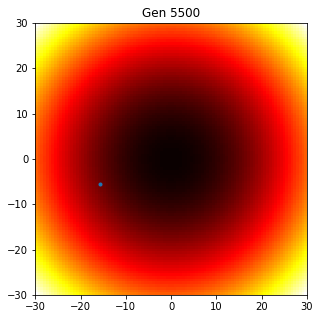

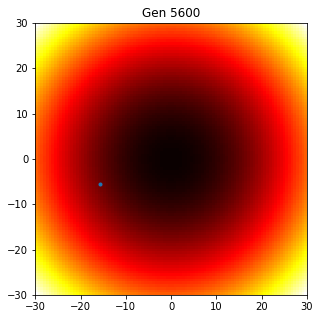

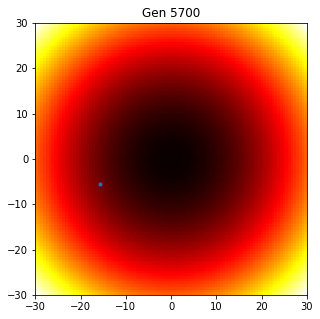

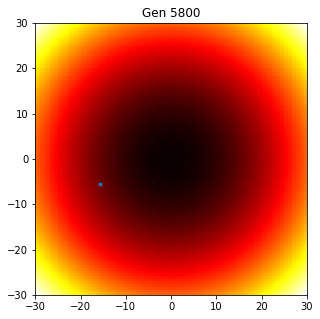

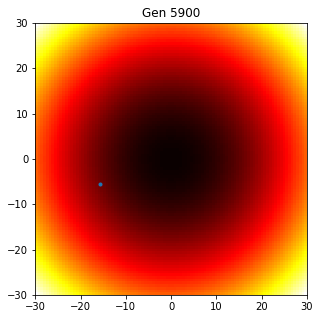

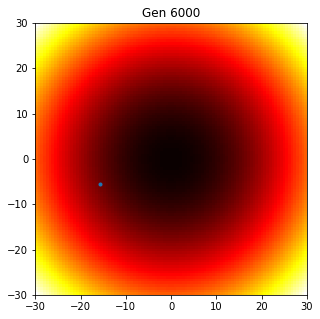

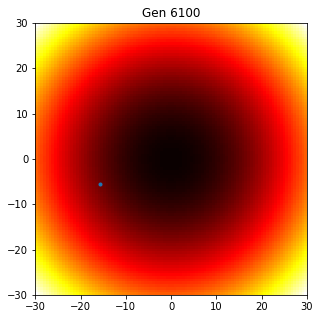

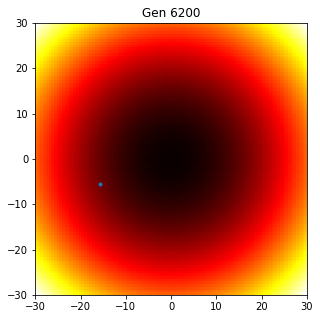

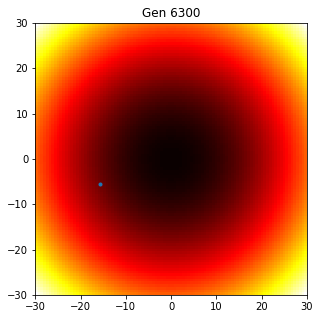

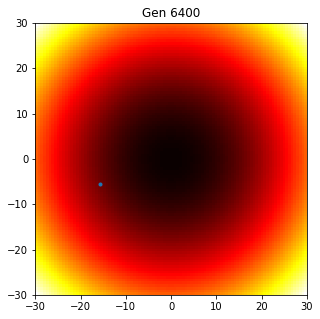

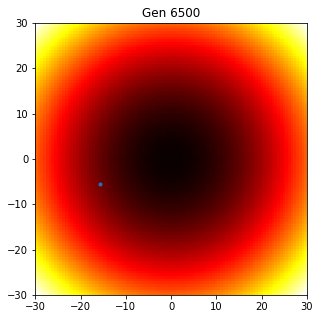

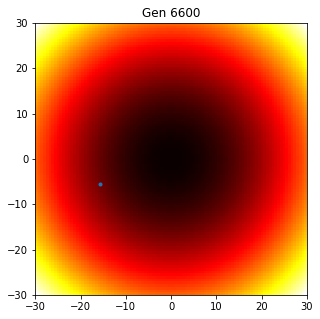

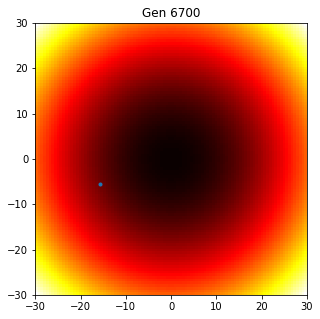

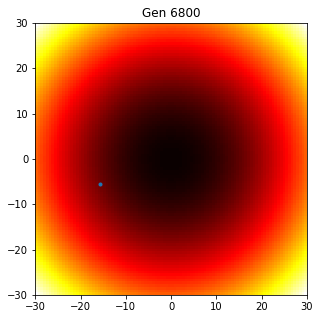

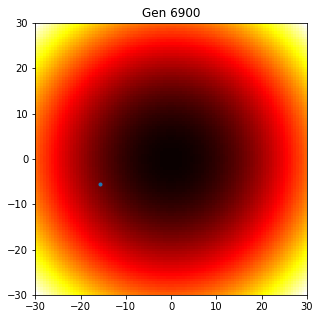

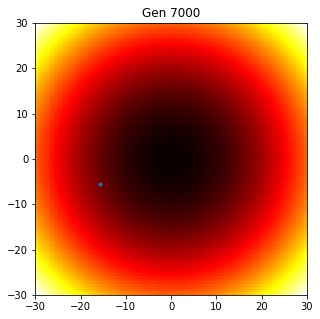

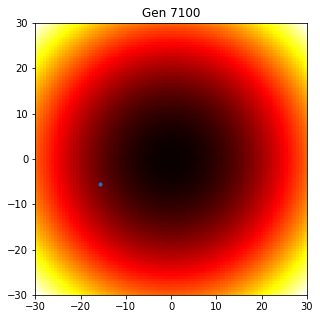

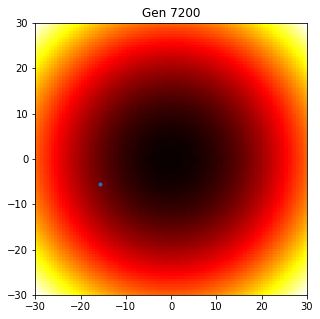

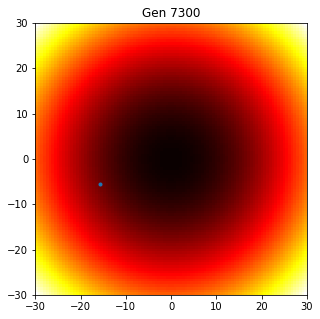

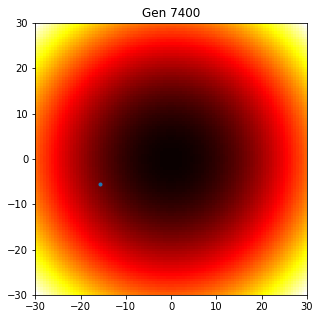

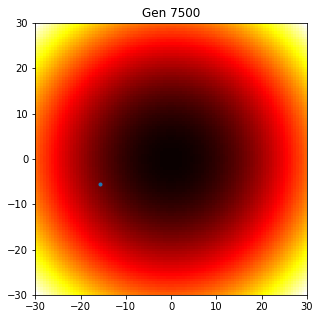

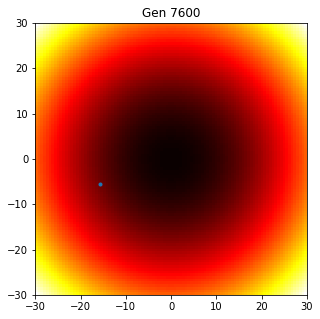

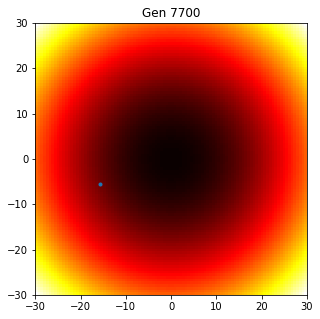

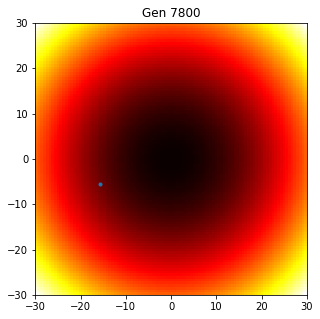

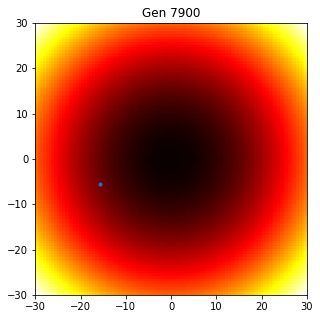

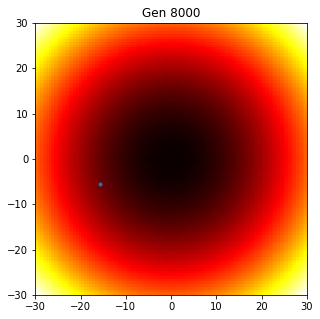

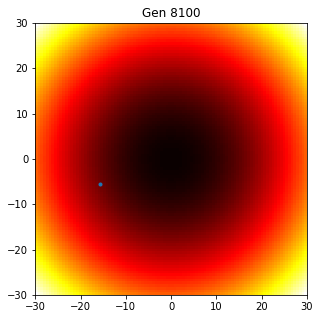

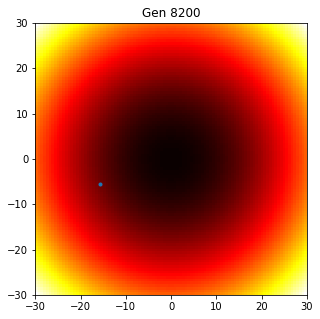

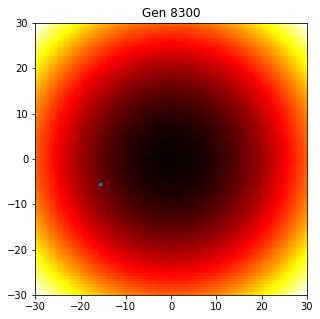

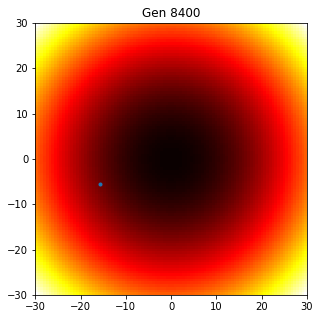

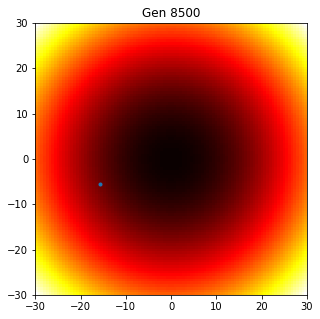

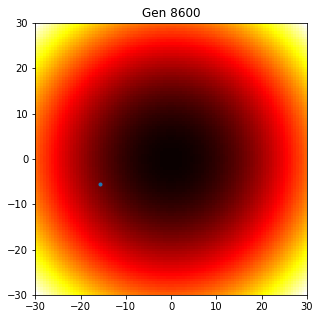

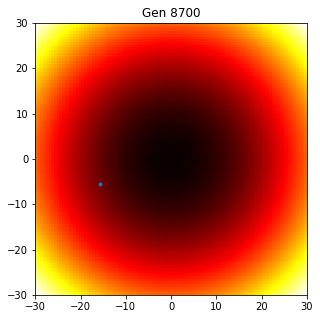

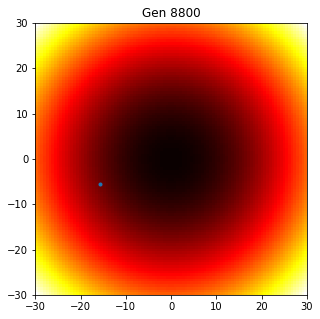

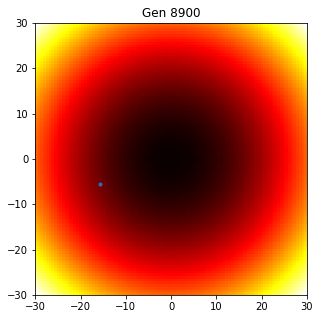

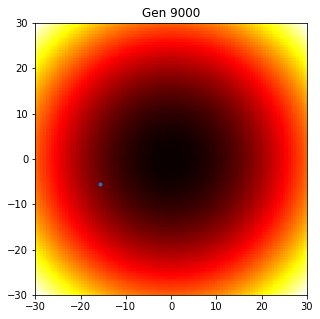

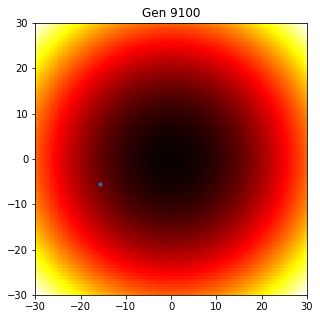

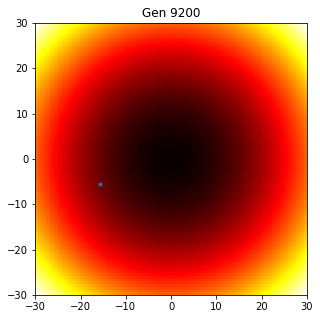

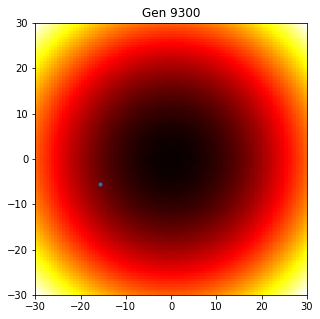

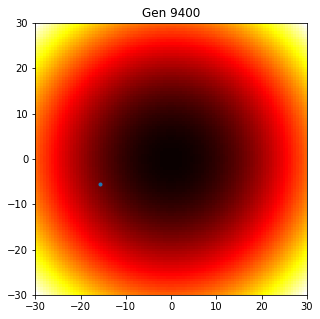

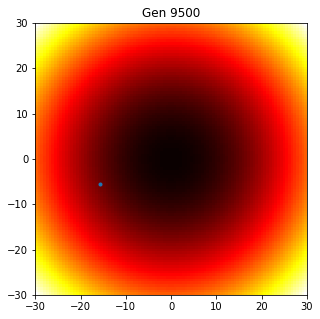

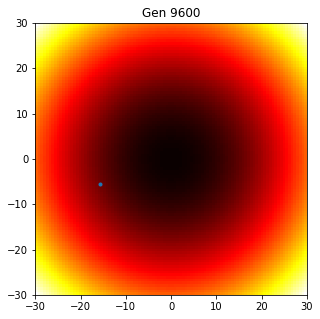

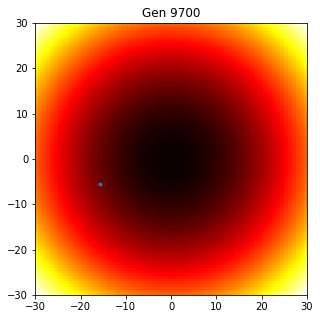

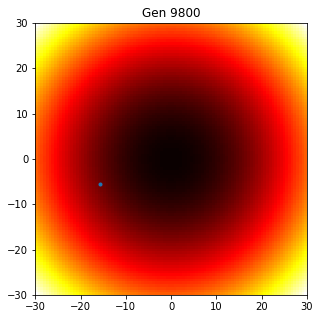

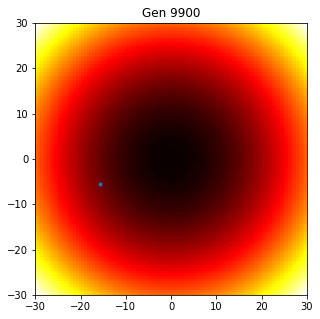

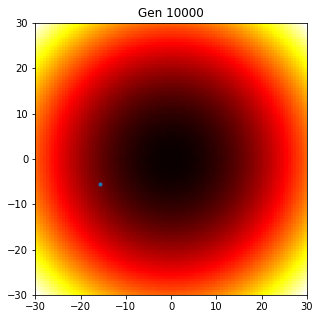

Best fit 555.7895310610503 at iteration 4295
Terminé.


In [ ]:
# fourni a titre d'exemple, ne pas modifier -- reprendre ce code et le modifier dans les cellules suivantes pour répondre aux questions.

def launch_random(individual, nbeval=10000, display=True, ma_func=sphere):
    parent = np.array(individual)
    #i est le nombre d'évaluations effectuées
    i=0
    parentFit = ma_func(individual)
    #bestFit contient la solution max de toutes
    bestFit = parentFit
    bestIt = 0
    while i<nbeval:
        child = np.random.uniform(-20,20,len(individual))
        childFit = ma_func(child)
        if childFit <= parentFit:
            parentFit = childFit
            parent = np.copy(child)
            if bestFit > parentFit:
                bestFit = parentFit
                bestIt = i
        i+=1
        solutions = np.array([parent])
        if display and ((i<10) or (i%100==0)):
            plot_results(ma_func,solutions, title="Gen %d"%(i)) # on projette uniquement sur les deux premières dimensions.
    print ("Best fit",bestFit,"at iteration",bestIt)
    return bestFit

dimensions = 16 # défini le nombre de dimensions de l'espace de recherche (remarque: seules les deux premières sont affichées avec la commande plot_results) 
launch_random([20]*dimensions,ma_func=sphere) # un vecteur de {dimensions} paramètres, dont on arbitrairement décidé que le point de départ était le vecteur {20,20,20,...,20}, ce qui correpond à une solution peu optimale.

print ("Terminé.")

_inclure ici quelques commentaires sur vos résultats_

Le meilleur individu semble bouger très rapidement sur les premières générations de l'algorithme pour atteindre le centre (environ 200) et prend une nouvelle valeur entre les itérations 5200 et 5300, où elle resteras

---

# Exercice A-1: algorithme (1+1)-ES

Nous allons maintenant implementer une stratégie d'évolution (1+1)-ES avec un sigma fixe.

Vous testerez cet algorithme sur les mêmes fonctions que précédemment. Vous tracerez (comme montré à la question précédente) l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma.

A noter que si la valeur de sigma peut influer significativement l'optimisation, l'initialisation compte aussi. Par exemple, si la solution initialement proposée se trouve dans une région ressemblant à un plateau (ie. plusieurs solutions proches obtiennent le même score), il sera difficile d'améliorer cette solution puisqu'une recherche locale s'apparentera à une marche aléatoire.

A noter aussi qu'en lançant plusieurs fois l'algorithme, vous obtiendrez des résultats différent à la fois en vitesse de convergence et de performance. Nous reviendrons sur ce point plus tard.

In [ ]:
indiv=[20]*dimensions
print(indiv)

child = indiv+0.5*np.random.normal(0,1,len(indiv))
print(child)
child = child+0.5*np.random.normal(0,1,len(indiv))
print(child)
child = child+0.5*np.random.normal(0,1,len(indiv))
print(child)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[19.38292347 19.78925066 19.99631134 20.35941319 19.27204222 20.50338151
 20.35542419 20.02493299 20.68211834 19.77342597 19.98836561 20.1269402
 19.99389559 20.64612615 19.88275737 20.61041058]
[19.44208477 19.85502471 19.79805717 19.98850856 19.44033221 20.6094611
 20.77104293 20.52898787 21.32894276 19.55867512 19.06865987 20.33158397
 20.29213432 21.25742583 20.40166299 20.16496775]
[19.56721992 19.87790843 18.51340163 19.17585441 20.27689169 19.32943279
 20.7935271  20.72412391 21.48840039 19.42868485 18.73334309 20.37668061
 20.51011497 21.6742322  20.14351852 19.81955521]


In [ ]:
#Stratégie avec un parent et un enfant. Le parent suivant est le meilleur des deux

def launch_oneplusone(individual, sigma, nbeval=10000, display=True, ma_func=sphere):
    parent = np.array(individual)
    #nombre_iteration est le nombre d'évaluations effectuées
    nombre_iteration=0
    parentFit = ma_func(individual)
    #print("initial fit: ", parentFit)
    #bestFit contient la solution max de toutes
    bestFit = parentFit
    bestIt = 0
    while nombre_iteration<nbeval:
        #Création de l'enfant
        child = parent+sigma*np.random.normal(0,1,len(individual))
        childFit = ma_func(child)
        #Modification du bestFit si le child est meilleur
        if childFit <= parentFit:
            parentFit = childFit
            parent = np.copy(child)
            if bestFit > parentFit:
                bestFit = parentFit
                bestIt = nombre_iteration
        nombre_iteration+=1
        solutions = np.array([parent])
        if display and ((nombre_iteration<10) or (nombre_iteration%100==0)):
            plot_results(ma_func,solutions, title="Gen %d"%(nombre_iteration)) # on projette uniquement sur les deux premières dimensions.
    print ("Best fit",bestFit,"at iteration",bestIt)
    return bestFit

dimensions = 16 # défini le nombre de dimensions de l'espace de recherche (remarque: seules les deux premières sont affichées avec la commande plot_results) 
launch_oneplusone([20]*dimensions, 5, display=False, ma_func=sphere) # un vecteur de {dimensions} paramètres, dont on arbitrairement décidé que le point de départ était le vecteur {20,20,20,...,20}, ce qui correpond à une solution peu optimale.

print ("Terminé.")

Best fit 60.078452829128665 at iteration 5651
Terminé.


_inclure ici quelques commentaires sur vos résultats_

Il est important de ne pas sélectionner un sigma trop petit, sinon la valeur l'algorithme ne progressera jamais assez vite vers la valeur cible. 0.01 par exemple est trop faible. Une valeur trop grande peut également être néfaste cependant, comme 10. ces deux valeurs semblent rester plus efficaces que l'algorithme aléatoire en général cependant.

---

# Exercice A-2: algorithme (1+1)-ES, règle des 1/5e

Nous allons maintenant implementer une stratégie d'évolution (1+1)-ES avec un sigma suivant la règle des 1/5e.

Vous testerez cette algorithme sur les mêmes fonction que précédemment. Vous tracerez l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma.

In [ ]:
def launch_ESonefifthRule(individual, sigma, nbeval=10000, display=True, ma_func=sphere):
    parent = np.array(individual)
    #nombre_iteration est le nombre d'évaluations effectuées
    sigma_store=np.zeros(nbeval)
    nombre_iteration=0
    parentFit = ma_func(individual)
    #print("initial fit: ", parentFit)
    #bestFit contient la solution max de toutes
    bestFit = parentFit
    bestIt = 0
    while nombre_iteration<nbeval:
        #Création de l'enfant
        child = parent+sigma*np.random.normal(0,1,len(individual))
        childFit = ma_func(child)
        #Modification du bestFit si le child est meilleur
        if childFit <= parentFit:
            parentFit = childFit
            parent = np.copy(child)
            sigma+=sigma
            if bestFit > parentFit:
                bestFit = parentFit
                bestIt = nombre_iteration
        else:
            sigma=sigma*(2**(-1/4))
        sigma_store[nombre_iteration]=sigma
        nombre_iteration+=1
        solutions = np.array([parent])
        if display and ((nombre_iteration<10) or (nombre_iteration%100==0)):
            plot_results(ma_func,solutions, title="Gen %d"%(nombre_iteration)) # on projette uniquement sur les deux premières dimensions.
    print ("Best fit",bestFit,"at iteration",bestIt)

    #y=range(0,nbeval)
    #plt.title("courbe des sigma")
    #print(sigma_store)
    #plt.plot(y, sigma_store, color='red')
    #plt.show()

    return bestFit

dimensions = 16 # défini le nombre de dimensions de l'espace de recherche (remarque: seules les deux premières sont affichées avec la commande plot_results) 
launch_ESonefifthRule([20]*dimensions, 5, display=False, ma_func=sphere) # un vecteur de {dimensions} paramètres, dont on arbitrairement décidé que le point de départ était le vecteur {20,20,20,...,20}, ce qui correpond à une solution peu optimale.

print ("Terminé.")

Best fit 8.949573650467081e-78 at iteration 9999
Terminé.


Avoir un sigma qui évolue en se rapprochant du centre permet de se rapprocher beaucoup plus fortement du centre. Plus le nombre d'itérations est elevé, plus la précision l'est également. C'est très différent de l'algoritheme avec sigma fixe.

---

# Exercice A-3: algorithme (mu,lambda)-ES

Vous testerez cette algorithme sur les mêmes fonction que précédemment. 

La méthode (*mu*,*lambda*) est une généralisation de la méthode (1+1) vue précédemment (qu'on peut noter aussi (*mu*=1 + *lambda*=1). Etant donnée une population d'individus, il s'agit de prendre les *mu* meilleurs, puis de créer *lambda* enfants. Chaque enfant aura pour parent l'un des *mu* parents (sélectionné au hasard). La population à la génération suivante sera constituée uniquement des *lambda* enfants ainsi construits (contrairement à la méthode (*mu*+*lambda*) ou les *mu* parents sont aussi copiés vers la génération suivante). 

Vous tracerez l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma. 

Vous prendrez pour commencer *mu*=5 et *lambda*=10. Comme point de départ, vous utiliserez une population initiale de *lambda* invididus générés au hasard (plutôt qu'un seul individu, comme c'était le cas précédemment).


In [ ]:
def launch_LambdaES(popInit, _mu, _lambda, sigma, nbeval=10000, display=True, ma_func=sphere):
    parent = np.array(popInit)
    print(parent)
    dimensions=popInit[0].size
    #nombre_iteration est le nombre d'évaluations effectuées
    nombre_iteration=0
    parentFit=10000
    for i in range(_lambda):
        score_parent=ma_func(parent[i])
        if parentFit>score_parent:
            parentFit=score_parent
    #print("initial fit: ", parentFit)
    #bestFit contient la solution max de toutes
    bestFit = parentFit
    bestIt = 0
    while nombre_iteration<nbeval:
        #sélection des parents
        parent_sorted=np.zeros(_lambda)
        for i in range(_lambda):
            parent_sorted[i]=ma_func(parent[i])
        parent_sorted=np.sort(parent_sorted)
        new_parents=np.zeros((_mu, dimensions))
        for i in range(len(new_parents)):
            for j in range(len(parent_sorted)):
                if ma_func(parent[j])==parent_sorted[i]:
                    new_parents[i]=parent[j]
                    break
        parent=new_parents

        #Création des enfants
        child=np.zeros((_lambda, dimensions))
        for i in range(len(child)):
            child[i] = parent[random.randint(0,4)]+sigma*np.random.normal(0,1,dimensions)
            childFit = ma_func(child)
        #Modification du bestFit
        for i in range(len(child)):
            childFit=ma_func(child[i])
            if bestFit > childFit:
                bestFit = childFit
                bestIt = nombre_iteration
        parent=child
        nombre_iteration+=1
        solutions = np.array([parent])
        if display and ((nombre_iteration<10) or (nombre_iteration%100==0)):
            plot_results(ma_func,solutions, title="Gen %d"%(nombre_iteration)) # on projette uniquement sur les deux premières dimensions.
    print ("Best fit",bestFit,"at iteration",bestIt)
    return bestFit

dimensions = 16 # défini le nombre de dimensions de l'espace de recherche (remarque: seules les deux premières sont affichées avec la commande plot_results) 
popInit=np.full((10, dimensions), 20)
launch_LambdaES(popInit, 5, 10, 0.01, display=False, ma_func=sphere) # un vecteur de {dimensions} paramètres, dont on arbitrairement décidé que le point de départ était le vecteur {20,20,20,...,20}, ce qui correpond à une solution peu optimale.

print ("Terminé.")

[[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]]
Best fit 0.001785717909262984 at iteration 9992
Terminé.


_inclure ici quelques commentaires sur vos résultats_

Cet algorithme, tout comme l'algorithme 1+1, dépend assez fortement du sigma et du nombre d'itérations. Une fois suffisamment rapproché du centre cependant, la valeur la plus correct se révèle dépendante de l'aléatoire, étant donné que le sigma reste fixe. Le fair de ne pas garder les parents les plus performant se révèle être moins performant que l'algorithme (1+1)-ES. 

---

# Exercice A-4: stabilité des algorithmes d'optimisation stochastique

Vous allez maintenant comparer l'aspect stochastique de ces algorithmes. Pour cela, observez le code ci-dessous, qui affiche le résultat de plusieurs exécutions du même algorithme de recherche aléatoire sous forme de violin graph. Utilisez la fonction Sphere, tester aussi avec la fonction Rastrigin. 


Best fit 860.6709673109615 at iteration 836
Best fit 795.9813479689694 at iteration 518
Best fit 1098.59336935918 at iteration 447
Best fit 1006.0666025186893 at iteration 236
Best fit 861.0306627976333 at iteration 840
Best fit 908.8564063706785 at iteration 765
Best fit 1246.4868153912776 at iteration 121
Best fit 1095.0580102073802 at iteration 118
Best fit 969.9368384745479 at iteration 224
Best fit 988.1522602191937 at iteration 825
Best fit 691.3578699325924 at iteration 395
Best fit 829.6935550298614 at iteration 284
Best fit 1079.7500469436857 at iteration 797
Best fit 646.3171766889211 at iteration 51
Best fit 914.0548191222226 at iteration 941
Best fit 587.9040083402111 at iteration 269
Best fit 1038.8487825752682 at iteration 298
Best fit 1029.703103466245 at iteration 347
Best fit 902.3814508670591 at iteration 630
Best fit 929.2676991158158 at iteration 936
Best fit 878.2442456948539 at iteration 910
Best fit 1073.4677673713195 at iteration 291
Best fit 957.4059975134903 a

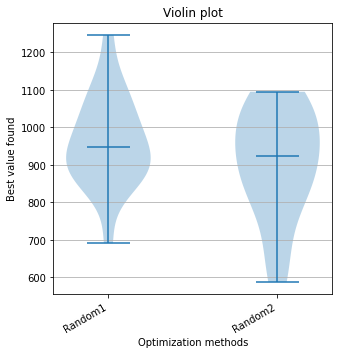

Terminé.


In [ ]:
# fourni a titre d'exemple, ne pas modifier -- répondre dans la cellule suivante.

resRandom1 = []
resRandom2 = []

evaluationBudget = 1000
centerInit = [20]*16
evalFunc = rastrigin

for i in range(20):
    resRandom1.append ( launch_random(centerInit,nbeval=evaluationBudget,display=False,ma_func=evalFunc) )
    resRandom2.append ( launch_random(centerInit,nbeval=evaluationBudget,display=False,ma_func=evalFunc) )    
    
allResults = {"Random1":resRandom1,"Random2":resRandom2}

plot_violin( allResults )

print ("Terminé.")

Testez la robustesse des algorithmes (1+1)-ES simple et (1+1)-ES règle des 1/5e sur plusieurs exécutions sur ces deux fonctions. Vous pouvez ré-utiliser le code des cellules précédentes pour afficher le résultat de plusieurs exécutions de l'algorithme (ex.: 5 exécutions).

Best fit 290.154990979075 at iteration 525
Best fit 328.33097773776257 at iteration 997
Best fit 339.9342755911267 at iteration 442
Best fit 502.44030496378844 at iteration 991
Best fit 317.3716741210119 at iteration 369
Best fit 262.66509940866604 at iteration 991
Best fit 345.0952033709624 at iteration 752
Best fit 176.1060556338501 at iteration 999
Best fit 338.95792357845517 at iteration 920
Best fit 133.3233056580935 at iteration 997
Best fit 286.8166524421354 at iteration 783
Best fit 354.19934968721805 at iteration 994
Best fit 317.479356906764 at iteration 929
Best fit 79.59654815095509 at iteration 999
Best fit 255.92702095487158 at iteration 968
Best fit 341.2645962699172 at iteration 999
Best fit 342.26992708933744 at iteration 825
Best fit 246.7467136787622 at iteration 999
Best fit 351.95891668676643 at iteration 502
Best fit 1262.4689694280432 at iteration 998
Best fit 326.85087118705604 at iteration 562
Best fit 284.5514017249511 at iteration 999
Best fit 380.51874018540

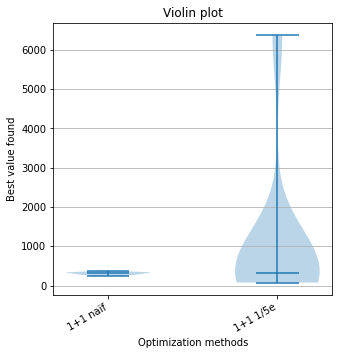

Terminé.


In [ ]:
resRandom1 = []
resRandom2 = []

evaluationBudget = 1000
centerInit = [20]*16
evalFunc = rastrigin
sigma = 5

for i in range(20):
    resRandom1.append ( launch_oneplusone(centerInit, sigma, nbeval=evaluationBudget,display=False,ma_func=evalFunc) )
    resRandom2.append ( launch_ESonefifthRule(centerInit, sigma, nbeval=evaluationBudget,display=False,ma_func=evalFunc) )    
    
allResults = {"1+1 naïf":resRandom1,"1+1 1/5e":resRandom2}

plot_violin( allResults )

print ("Terminé.")

On peut observer avec ce test que si l'algorithme avec la règle des 1/5e était le plus efficace sur évaluation sphérique, c'est bien moins le cas sur des problèmes plus compliqués, où elle a tendance à s'effondrer dans des problèmes avec de nombreuses solutions optimales locales.

# Exercice A-5: comparaison entre les algorithmes

 Vous allez maintenant comparer tous les algorithmes précédents en traçant les résultat sur une même figure. Sur la même figure, vous tracerez aussi les résultats de deux méthodes classiques d'optimisation: Nelder-Mead et Powell.  Vous pouvez tout écrire dans la cellule ci-dessous.

_Remarque: Pour que les comparaisons soient équitables, il faut que les points de départ des optimisation "classiques" soient similaires. Vous pourrez éventuellement ajouter un diagramme représentant le nombre d'évaluation par méthode._

In [ ]:
def launch_nelder(center, nbeval=10000, display=False, ma_func=sphere):
    nelder = minimize(ma_func, center, method='nelder-mead',options={'xtol': 1e-8, 'disp': display})
    return nelder.fun

def launch_powell(center, nbeval=10000, display=False, ma_func=sphere):
    powell = minimize(ma_func, center, method='powell',options={'xtol': 1e-8, 'disp': display})
    return powell.fun

resOneplusone = []
resRandom = []
resOneFifthRule = []
resNelder = []
resPowell = []

# A compléter

print ("Terminé.")

Terminé.


_inclure ici quelques commentaires sur vos résultats_

---

# Exercice A-6: algorithme CEM

Nous allons maintenant implémenter l'algorithme Cross Entropy Method (CEM)

Vous utiliserez pour cela l'algorithme tel qu'il a présenté en cours (cf. slides), et le pseudo-code disponible sur [wikipedia](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_l%27entropie_crois%C3%A9e#Pseudo-code)

Vous testerez cet algorithme sur les mêmes fonctions que précédemment. De même que précédemment, vous tracerez l'évolution de la population pour chaque exécution. 

Vous étudierez l'impact du choix du point initial et du sigma. Vous comparerez également la version complète avec la version pureCMA, qui n'inclut pas certains mécanismes comme le restart. 

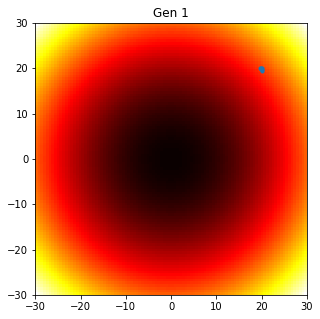

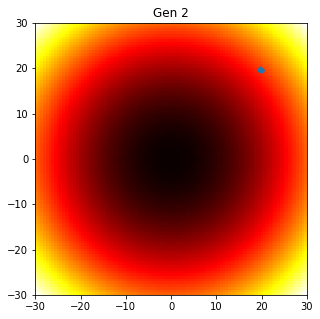

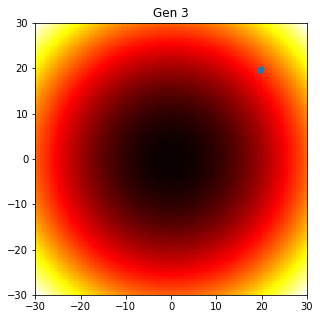

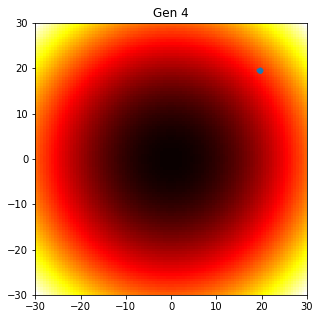

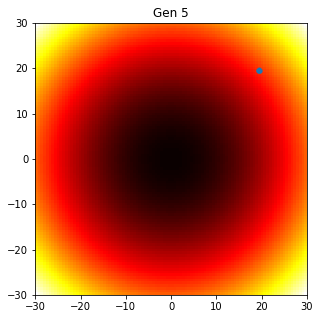

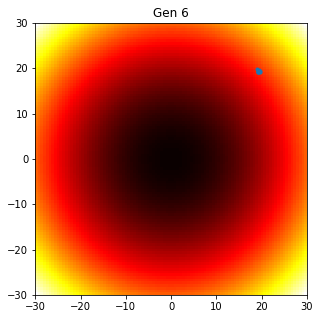

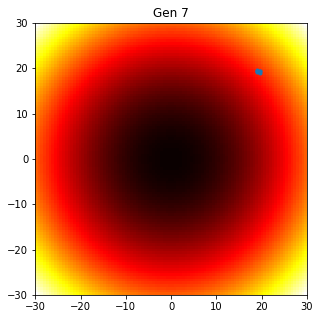

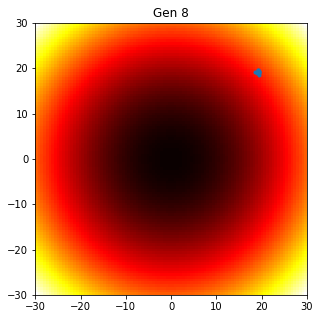

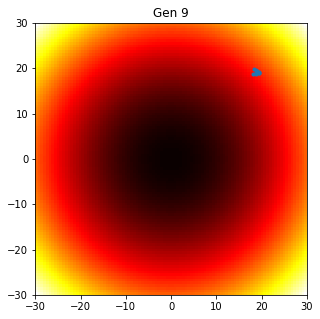

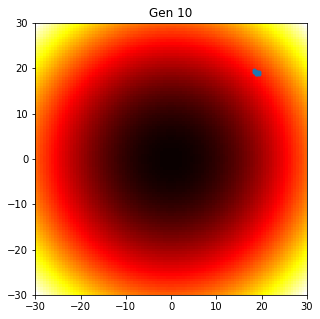

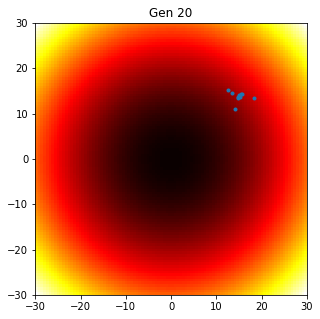

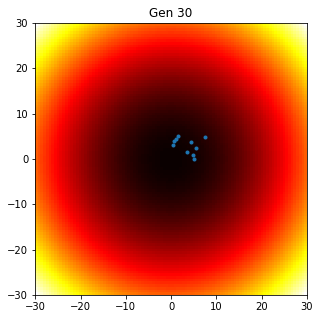

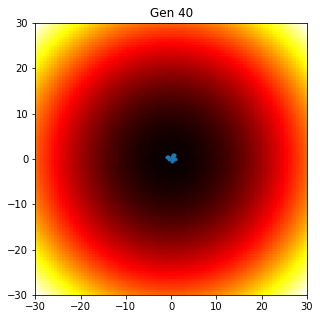

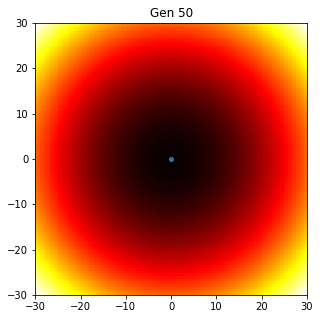

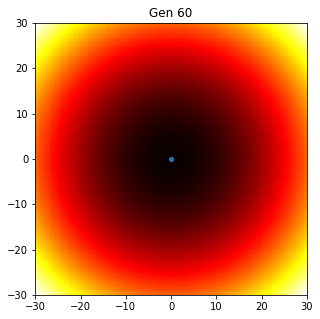

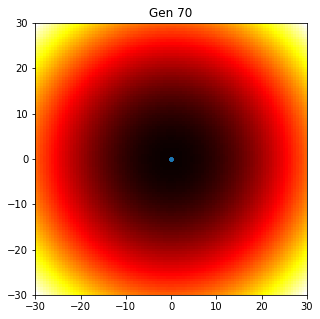

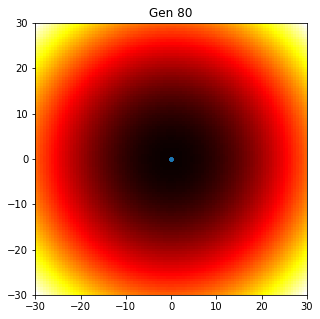

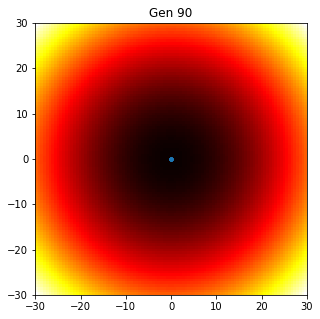

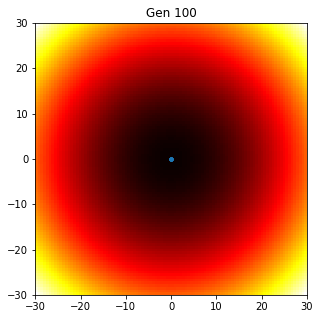

Best fit 6.728555701256596e-15 at iteration 98
Terminé.


In [ ]:
def launch_CEM(center, sigma, nbeval=100, display=True, ma_func=sphere):
    #Initialiser les valeurs
    nombre_iteration=0
    nombre_valeurs=100
    nombre_valeurs_sélectionnées=nombre_valeurs/10
    dimensions=len(center)
    bestFit=7000
    bestIt=0

    while(nombre_iteration<nbeval):

        #Créer les valeurs aléatoires
        points_alea=np.random.normal(center,sigma, (nombre_valeurs, dimensions))
        # points_alea=np.zeros((nombre_valeurs, dimensions))
        # for i in range(len(points_alea)):
        #     points_alea[i]=np.random.normal(center,sigma, (nombre_valeurs, dimensions))

        #Classer les valeurs dans un ordre croissant (pas la méthode la plus optimisée du tout)
        score_alea=np.zeros(len(points_alea))
        for i in range(len(points_alea)):
            score_alea[i]=ma_func(points_alea[i])
        score_alea=np.sort(score_alea)
        points_selectionnés=np.zeros((int(nombre_valeurs_sélectionnées), dimensions))
        if score_alea[1]<bestFit:
            bestFit=score_alea[1]
            bestIt=nombre_iteration-1
        
        
        for i in range(len(points_selectionnés)):
            for j in range(len(points_alea)):
                if score_alea[i]==ma_func(points_alea[j]):
                    points_selectionnés[i]=points_alea[j]
        #print(points_selectionnés)
        #Trouver une valeur moyenne en utilisant 10% des meilleures et calculer nouveau centre et nouveau sigma
        center=np.mean(points_selectionnés, axis=0)
        sigma=np.sqrt(np.var(points_selectionnés))

        nombre_iteration+=1

        if display and ((nombre_iteration<10) or (nombre_iteration%10==0)):
            plot_results(ma_func,points_selectionnés, title="Gen %d"%(nombre_iteration)) # on projette uniquement sur les deux premières dimensions.

    print("Best fit",bestFit,"at iteration",bestIt)

dimensions = 16 # défini le nombre de dimensions de l'espace de recherche (remarque: seules les deux premières sont affichées avec la commande plot_results) 
centre_init = np.full(16, 20)
launch_CEM(centre_init, 0.2, display=True, ma_func=sphere) # un vecteur de {dimensions} paramètres, dont on arbitrairement décidé que le point de départ était le vecteur {20,20,20,...,20}, ce qui correpond à une solution peu optimale.

print ("Terminé.")



L'algorithme CEM semble être celui qui converge le plus vite. Il présente des similitudes proches de l'algorithme (1+1) avec la règle des 1/5e tout en étant beaucoup plus rapide et efficace. C'est probablement le meilleur algorithme de tous à vu d'oeil. Nous allons le vérifier.

Reprenez l'exercice 5 pour ajouter CEM sur le graphe.

In [ ]:
def launch_nelder(center, nbeval=10000, display=False, ma_func=sphere):
    nelder = minimize(ma_func, center, method='nelder-mead',options={'xtol': 1e-8, 'disp': display})
    return nelder.fun

def launch_powell(center, nbeval=10000, display=False, ma_func=sphere):
    powell = minimize(ma_func, center, method='powell',options={'xtol': 1e-8, 'disp': display})
    return powell.fun

resCEM = []
resOneplusone = []
resRandom = []
resOneFifthRule = []
resNelder = []
resPowell = []

# A compléter

print ("Terminé.")

Terminé.


_inclure ici quelques commentaires sur vos résultats_

Modifiez CEM pour que l'amplitude de la mutation (i.e. *sigma*) diminue au cours du temps. La vitesse à laquelle diminue ce taux est fixe. Cela permet d'éviter le bruit dû à la mutation qui peu géner la conférence en fin d'optimisation.

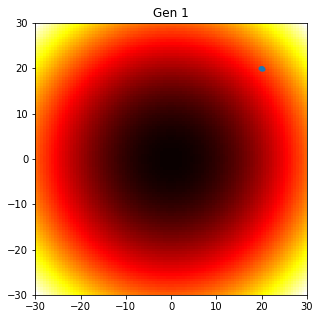

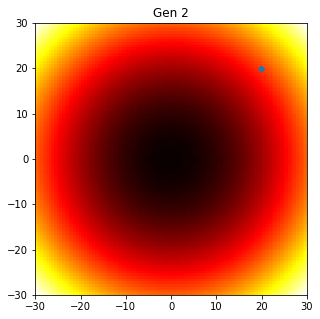

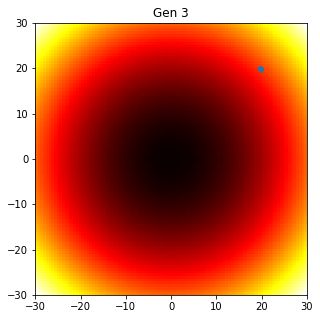

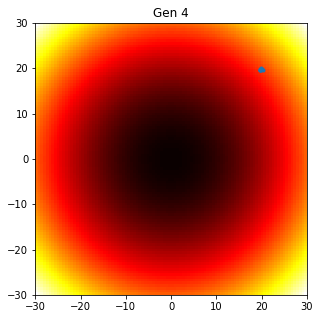

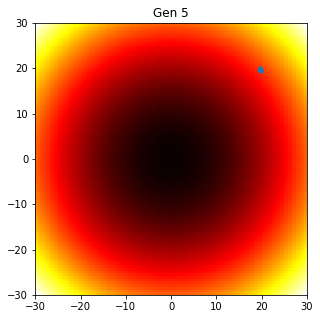

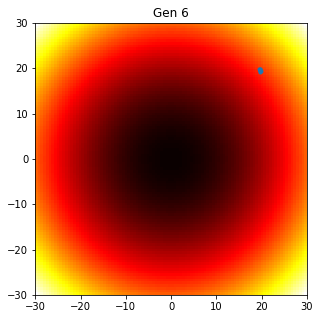

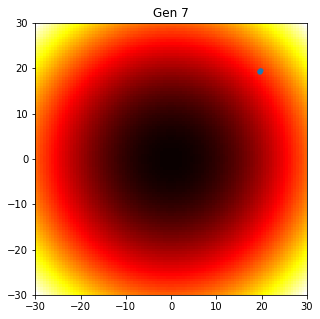

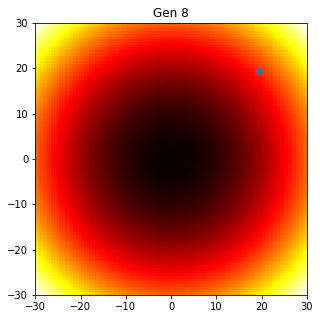

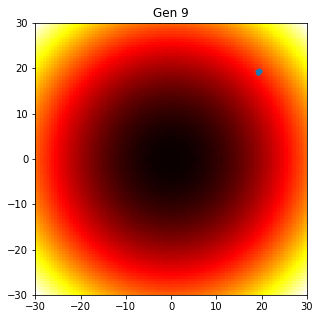

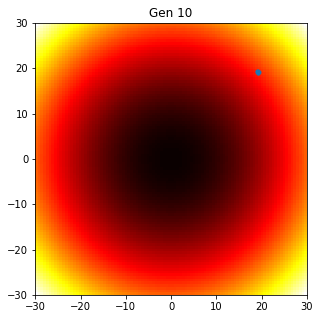

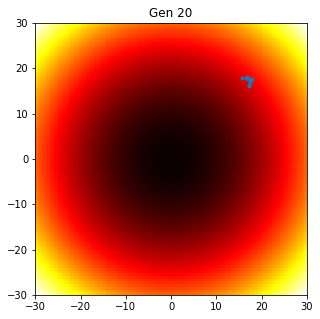

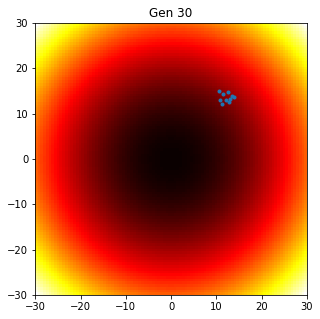

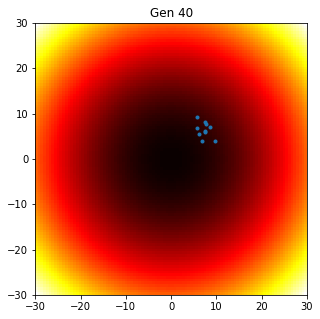

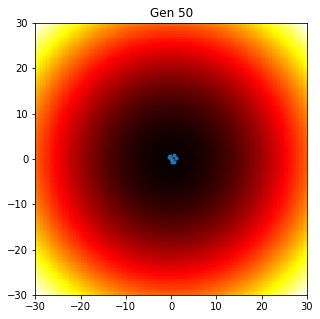

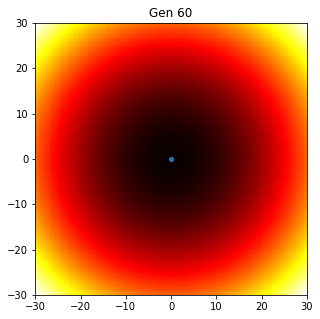

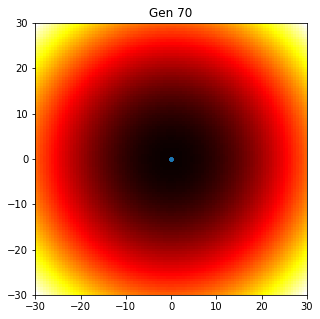

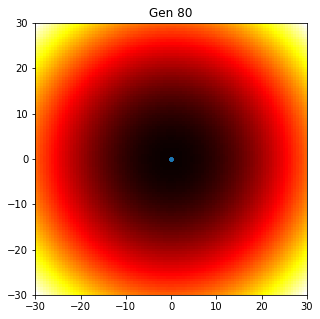

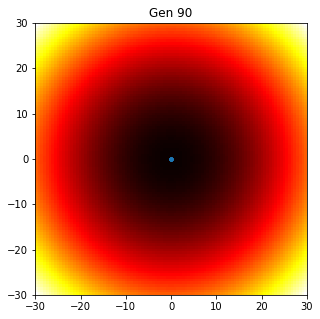

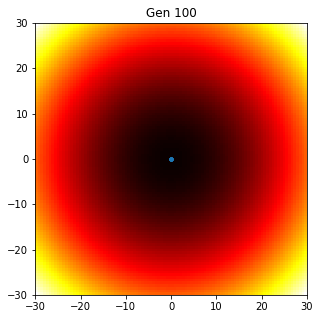

Best fit 1.8576305955940463e-12 at iteration 98
Terminé.


In [ ]:
def declining_CEM(center, sigma, nbeval=100, display=True, ma_func=sphere):
    #Initialiser les valeurs
    nombre_iteration=0
    nombre_valeurs=100
    nombre_valeurs_sélectionnées=nombre_valeurs/10
    dimensions=len(center)
    bestFit=7000
    bestIt=0

    while(nombre_iteration<nbeval):

        #Créer les valeurs aléatoires
        points_alea=np.random.normal(center,sigma, (nombre_valeurs, dimensions))
        # points_alea=np.zeros((nombre_valeurs, dimensions))
        # for i in range(len(points_alea)):
        #     points_alea[i]=np.random.normal(center,sigma, (nombre_valeurs, dimensions))

        #Classer les valeurs dans un ordre croissant (pas la méthode la plus optimisée du tout)
        score_alea=np.zeros(len(points_alea))
        for i in range(len(points_alea)):
            score_alea[i]=ma_func(points_alea[i])
        score_alea=np.sort(score_alea)
        points_selectionnés=np.zeros((int(nombre_valeurs_sélectionnées), dimensions))
        if score_alea[1]<bestFit:
            bestFit=score_alea[1]
            bestIt=nombre_iteration-1
        
        
        for i in range(len(points_selectionnés)):
            for j in range(len(points_alea)):
                if score_alea[i]==ma_func(points_alea[j]):
                    points_selectionnés[i]=points_alea[j]
        #Trouver une valeur moyenne en utilisant 10% des meilleures et calculer nouveau centre et nouveau sigma
        center=np.mean(points_selectionnés, axis=0)
        sigma=np.sqrt(np.var(points_selectionnés))
        sigma=sigma-sigma*((nbeval-nombre_iteration)/nbeval)

        nombre_iteration+=1

        if display and ((nombre_iteration<10) or (nombre_iteration%10==0)):
            plot_results(ma_func,points_selectionnés, title="Gen %d"%(nombre_iteration)) # on projette uniquement sur les deux premières dimensions.

    print("Best fit",bestFit,"at iteration",bestIt)

dimensions = 16 # défini le nombre de dimensions de l'espace de recherche (remarque: seules les deux premières sont affichées avec la commande plot_results) 
centre_init = np.full(16, 20)
launch_CEM(centre_init, 0.2, display=True, ma_func=sphere) # un vecteur de {dimensions} paramètres, dont on arbitrairement décidé que le point de départ était le vecteur {20,20,20,...,20}, ce qui correpond à une solution peu optimale.

print ("Terminé.")

_inclure ici quelques commentaires sur vos résultats_

Etant donné que l'algorithme CEM contient déjà un élément qui réduit la mutation en se rapprochant de la valeur optimale, je ne suis pas très sûre de l'utilité d'en rajouter. Mais il faut faire attention à avoir un nombre d'itérations suffisamment important par rapport à la vitesse de ralentissement des mutations, sinon on se retrouve avec un algoritheme moins bon que l'élgorithem CEM initial.

---
---
---

# <font color='orange'>PARTIE B: optimisation d'un pendule inversé</font>

OpenAI Gym (https://gym.openai.com/) est un framework permettant de lancer facilement des expériences d'apprentissage par renforcement. Nous allons l'utiliser pour tester les algorithmes évolutionnistes. Pour cet exercice, vous êtes laissé en autonomie: vous devez donc lire attentivement la documentation et les exemples.

# Importation des librairies et définition des fonctions utiles pour la partie B

Remarque: *Il est nécessaire d'exécuter ces cellules une seule fois. En cas de redémarrage du noyau, il faut relancer ces cellules. Il n'est pas nécessaire de regarder le code de ces cellules, elles servent seulement de soutien à la partie B.*

In [ ]:
# source: https://colab.research.google.com/drive/124koV4mf1tQ4av9jAJJuWsyuhJyLyd70#scrollTo=G9UWeToN4r7D

#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

!pip install gym[classic_control] > /dev/null 2>&1 
# for pygame

from datetime import datetime
from datetime import date

import base64
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

import gym
from gym import logger as gymlogger
# from gym.wrappers import Monitor # deprecated 2023 - https://stackoverflow.com/questions/71520568/importerror-cannot-import-name-monitor-from-gym-wrappers
from gym.wrappers.record_video import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.3
    Uninstalling setuptools-63.4.3:
      Successfully uninstalled setuptools-63.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.

 2023-03-17 15:36:10 GMT
OK.


In [ ]:
# source: https://colab.research.google.com/drive/124koV4mf1tQ4av9jAJJuWsyuhJyLyd70#scrollTo=G9UWeToN4r7D
# modification mineur: ajout de l'argument loop dans la fonction show_video(loop=True)

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video(loop=True):
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    if loop == True:
      ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
      ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True) # !!! 2023
  env.reset() # !!! 2023
  #env = Monitor(env, './video', force=True)
  return env

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-17 15:36:10 GMT
OK.


In [ ]:
# A simple neural network object
# source: https://github.com/AsmaBRZ/Evolutionary-algorithms/blob/master/fixed_structure_nn_numpy.py

# coding: utf-8

import numpy as np

## Suppress TF info messages

import os

def sigmoid(x):
    return 1./(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)


def gen_simplemlp(n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5):
    n_neurons = [n_neurons_per_hidden]*n_hidden_layers if np.isscalar(n_neurons_per_hidden) else n_neurons_per_hidden
    i = Input(shape=(n_in,))
    x = i
    for n in n_neurons:
        x = Dense(n, activation='sigmoid')(x)
    o = Dense(n_out, activation='tanh')(x)
    m = Model(inputs=i, outputs=o)
    return m
    

class SimpleNeuralControllerNumpy():
    def __init__(self, n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5, params=None):
        self.dim_in = n_in
        self.dim_out = n_out
        # if params is provided, we look for the number of hidden layers and neuron per layer into that parameter (a dicttionary)
        if (not params==None):
            if ("n_hidden_layers" in params.keys()):
                n_hidden_layers=params["n_hidden_layers"]
            if ("n_neurons_per_hidden" in params.keys()):
                n_neurons_per_hidden=params["n_neurons_per_hidden"]
        self.n_per_hidden = n_neurons_per_hidden
        self.n_hidden_layers = n_hidden_layers
        self.weights = None 
        self.n_weights = None
        self.init_random_params()
        self.out = np.zeros(n_out)
        #print("Creating a simple mlp with %d inputs, %d outputs, %d hidden layers and %d neurons per layer"%(n_in, n_out,n_hidden_layers, n_neurons_per_hidden))

    
    def init_random_params(self):
        if(self.n_hidden_layers > 0):
            self.weights = [np.random.random((self.dim_in,self.n_per_hidden))] # In -> first hidden
            self.bias = [np.random.random(self.n_per_hidden)] # In -> first hidden
            for i in range(self.n_hidden_layers-1): # Hidden -> hidden
                self.weights.append(np.random.random((self.n_per_hidden,self.n_per_hidden)))
                self.bias.append(np.random.random(self.n_per_hidden))
            self.weights.append(np.random.random((self.n_per_hidden,self.dim_out))) # -> last hidden -> out
            self.bias.append(np.random.random(self.dim_out))
        else:
            self.weights = [np.random.random((self.dim_in,self.dim_out))] # Single-layer perceptron
            self.bias = [np.random.random(self.dim_out)]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])

    def get_parameters(self):
        """
        Returns all network parameters as a single array
        """
        flat_weights = np.hstack([arr.flatten() for arr in (self.weights+self.bias)])
        return flat_weights

    def set_parameters(self, flat_parameters):
        """
        Set all network parameters from a single array
        """
        i = 0 # index
        to_set = []
        self.weights = list()
        self.bias = list()
        if(self.n_hidden_layers > 0):
            # In -> first hidden
            w0 = np.array(flat_parameters[i:(i+self.dim_in*self.n_per_hidden)])
            self.weights.append(w0.reshape(self.dim_in,self.n_per_hidden))
            i += self.dim_in*self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                w = np.array(flat_parameters[i:(i+self.n_per_hidden*self.n_per_hidden)])
                self.weights.append(w.reshape((self.n_per_hidden,self.n_per_hidden)))
                i += self.n_per_hidden*self.n_per_hidden
            # -> last hidden -> out
            wN = np.array(flat_parameters[i:(i+self.n_per_hidden*self.dim_out)])
            self.weights.append(wN.reshape((self.n_per_hidden,self.dim_out)))
            i += self.n_per_hidden*self.dim_out
            # Samefor bias now
            # In -> first hidden
            b0 = np.array(flat_parameters[i:(i+self.n_per_hidden)])
            self.bias.append(b0)
            i += self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                b = np.array(flat_parameters[i:(i+self.n_per_hidden)])
                self.bias.append(b)
                i += self.n_per_hidden
            # -> last hidden -> out
            bN = np.array(flat_parameters[i:(i+self.dim_out)])
            self.bias.append(bN)
            i += self.dim_out
        else:
            n_w = self.dim_in*self.dim_out
            w = np.array(flat_parameters[:n_w])
            self.weights = [w.reshape((self.dim_in,self.dim_out))]
            self.bias = [np.array(flat_parameters[n_w:])]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])
    
    def predict(self,x):
        """
        Propagate
        """
        if(self.n_hidden_layers > 0):
            #Input
            a = np.matmul(x,self.weights[0]) + self.bias[0]
            y = sigmoid(a)
            # hidden -> hidden
            for i in range(1,self.n_hidden_layers-1):
                a = np.matmul(y, self.weights[i]) + self.bias[i]
                y = sigmoid(a)
            # Out
            a = np.matmul(y, self.weights[-1]) + self.bias[-1]
            out = tanh(a)
            return out
        else: # Simple monolayer perceptron
            return tanh(np.matmul(x,self.weights[0]) + self.bias[0])

    def __call__(self,x):
        """Calling the controller calls predict"""
        return self.predict(x)

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2023-03-17 15:36:10 GMT
OK.


---

# Question B-0: simulation du pendule inversé

Le code ci-dessous montre comment lancer la simulation d'un pendule inversé en utilisant OpenAI Gym. Etudiez-le et exécutez-le.



In [ ]:
import gym
#env = gym.make('CartPole-v1')
env = wrap_env( gym.make('CartPole-v1') ) # colab-specific # needs py-game (import in earlier cell)

observation = env.reset()

#for _ in range(1000):
#while True:
maxEvaluations = 10
evaluation = 0
while evaluation < maxEvaluations:
    env.render()
    action = env.action_space.sample() 
    observation, reward, done, info = env.step(action) 

    if done:
      evaluation = evaluation + 1
      observation = env.reset()
      print ("obs:",observation,type(observation),observation.shape)
      #show_video(False) # colab-specific

env.close()

show_video() # colab-specific

obs: [-0.0271635   0.04814935 -0.04149057  0.01116616] <class 'numpy.ndarray'> (4,)
obs: [-0.02830494  0.04935564  0.03291176  0.00506277] <class 'numpy.ndarray'> (4,)
obs: [ 0.02670737  0.02837726  0.04926644 -0.04006073] <class 'numpy.ndarray'> (4,)
obs: [-0.01862236  0.03660095 -0.04745666  0.02610319] <class 'numpy.ndarray'> (4,)
obs: [ 0.0317798   0.01376046  0.00859329 -0.00283605] <class 'numpy.ndarray'> (4,)
obs: [-0.02850848  0.02964774  0.04808282  0.04449116] <class 'numpy.ndarray'> (4,)
obs: [-0.04805171 -0.03237477  0.01935897  0.04423061] <class 'numpy.ndarray'> (4,)
obs: [ 0.00631144  0.028248   -0.04490601  0.01841381] <class 'numpy.ndarray'> (4,)
obs: [0.01055104 0.00793526 0.04224307 0.04468449] <class 'numpy.ndarray'> (4,)
obs: [ 0.0082554   0.00512774  0.00822758 -0.04390707] <class 'numpy.ndarray'> (4,)


# Question B-1

En partant de l'exemple de la documentation et du code fourni pour le réseau de neurones dans la première cellule ci-dessous, faites une expérience pour optimiser les paramètres d'un réseau de neurones contrôlant un pendule inversé (environnement 'CartPole-v1') avec CMA-ES. Imposez une limite à 500 pas de temps au-delà de laquelle l'expérience est considérée comme réussie. 

In [ ]:
# Exemple de création d'un réseau de neurones multi-couches ("multi-layered perceptron")

nbInputs = 4
nbOutputs = 1
nbHiddenLayers = 2
nbNeuronsPerLayer = 5

nn=SimpleNeuralControllerNumpy(nbInputs,nbOutputs,nbHiddenLayers,nbNeuronsPerLayer) 

# NN parameters

theta = nn.get_parameters() # get default parameters
for i in range(len(theta)):
  theta[i] = random.random()*2.0-1.0 # set our own parameter values
nn.set_parameters(theta)
print ("NN parameters:",theta)

# running NN

observation = np.array( [ -0.03760372,0.00724161,-0.03663132,0.01225319 ], np.float64 )

print ("Input values:", observation)

outputValues = nn.predict(observation)

print ("Output values:", outputValues)


NN parameters: [ 0.11948132 -0.32919108  0.39048868 -0.98013027  0.11580647 -0.61081289
 -0.95514137  0.89359981  0.51152329 -0.53272591 -0.54011614  0.51515702
  0.00305447  0.44156664 -0.70185055  0.05370758  0.22698021  0.8851676
 -0.00327791 -0.96901579 -0.14157057 -0.87611056 -0.93610878  0.33666854
  0.51032066  0.25080608 -0.51196856 -0.4579189  -0.08383799 -0.22876856
  0.02204102  0.97307973 -0.03740861 -0.53917353  0.53597227 -0.0407292
 -0.42890383  0.17201389 -0.51507697 -0.93969162  0.22238199  0.91312448
  0.41702703  0.46651656 -0.30342911 -0.49794575 -0.83497228  0.96062928
  0.72004589 -0.33316183  0.02165322 -0.00299337  0.58378727 -0.03285811
  0.95618363  0.8761042   0.70003624 -0.30924965 -0.7211261  -0.27900562
  0.55855718]
Input values: [-0.03760372  0.00724161 -0.03663132  0.01225319]
Output values: [0.55493626]


In [17]:
# A compléter 

_inclure ici quelques commentaires sur vos résultats_

--- 

# Question B-2

Re-calculez plusieurs fois la fitness du meilleur contrôleur généré. Visualisez les comportements correspondants. Que constatez-vous ? Quel est le problème ? Proposez une solution pour le résoudre.

In [ ]:
# A compléter

_inclure ici quelques commentaires sur vos résultats_

---
---
---

# <font color='orange'>PARTIE C: exercices bonus</font>

Si vous avez fini tout le reste... A faire en complète autonomie.


# Question C-1: 

A partir de l'implémentation (1+lambda)-ES, implémenter (1) un algorithme (1,lambda)-ES, puis (mu+lambda)-ES et (mu,lambda)-ES. Etudiez l'influence des valeurs de mu et lambda.


In [ ]:
# A compléter

# Question C-2: 

Comparez l'algorithme CMA-ES avec les algorithmes précédents. Pour cela, importez et utilisez une implémentation existante (par exemple celle proposée dans DEAP: https://deap.readthedocs.io/en/master/examples/cmaes.html)

In [ ]:
# A compléter

# Question C-3:

A partir de l'expérience du pendule inversé, faites le même genre d'expériences avec d'autres environnement proposé dans OpenAI gym, par exemple le BipedalWalker (attention, le temps nécessaire pour l'optimisation peut rapidement devenir très long)


In [ ]:
# A compléter

*Fin du sujet.*
